In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [2]:
#Load Dataset
df = pd.read_excel("marketing_campaign.xlsx")

# Quick look
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
#Dataset Info & Missing Values
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Duplicate Rows ---", df.duplicated().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetPro

In [4]:
#Data Cleaning
# Drop duplicates
df.drop_duplicates(inplace=True)

# Handle missing income with median
df['Income'] = df['Income'].fillna(df['Income'].median())

# Convert date to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
#Feature Engineering
# Age
df['Age'] = 2025 - df['Year_Birth']

# Family size
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1  # +1 for customer

# Total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# Total accepted campaigns
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Accepted_Campaigns'] = df[campaign_cols].sum(axis=1)

df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Family_Size,Total_Spending,Total_Accepted_Campaigns
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,68,1,1617,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,71,3,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,60,1,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,41,2,53,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,44,2,422,0


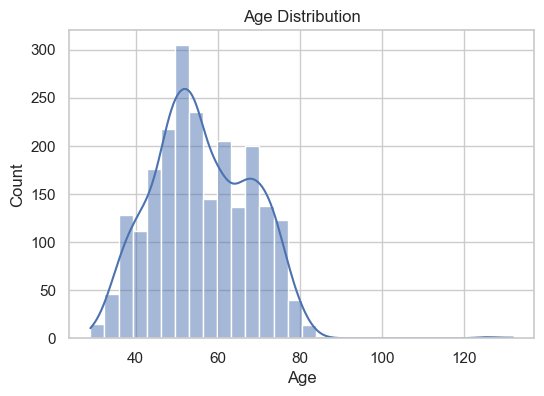

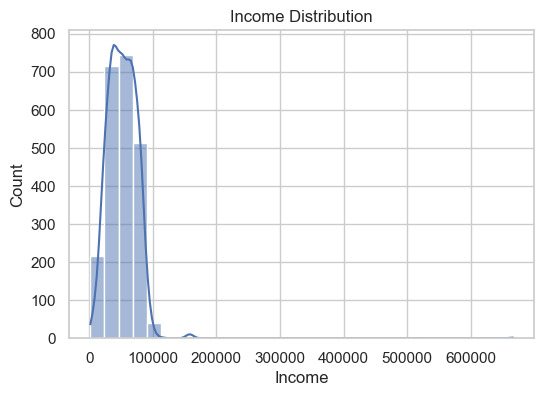

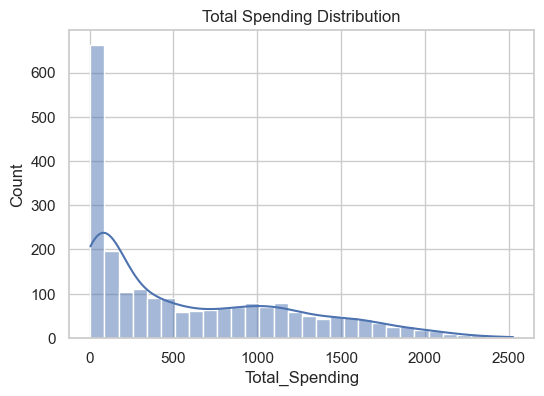

In [6]:
#Univariate Analysis
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.show()


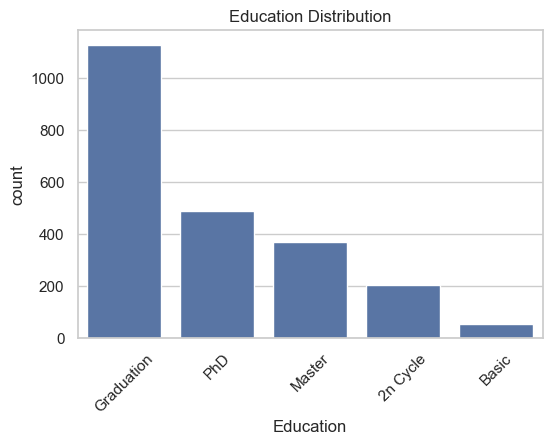

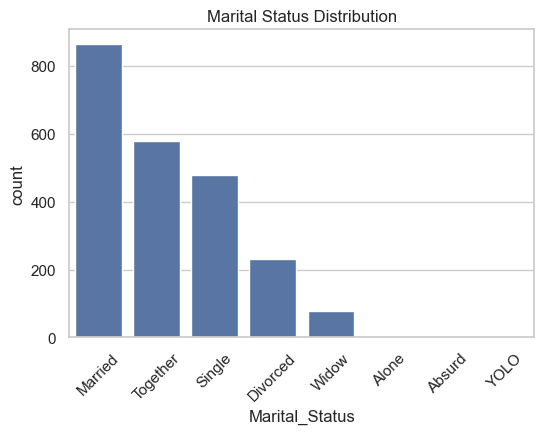

In [7]:
#Categorical Counts
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
plt.title('Education Distribution')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()


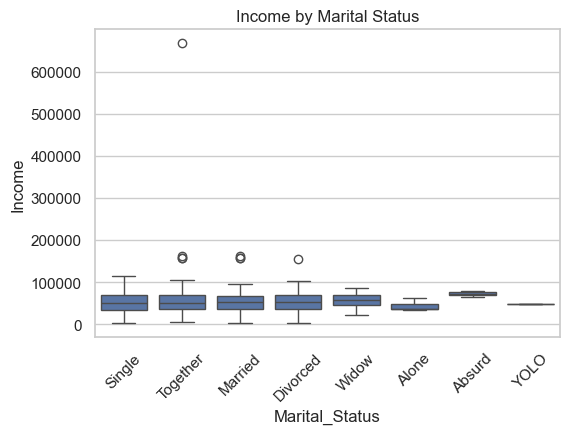

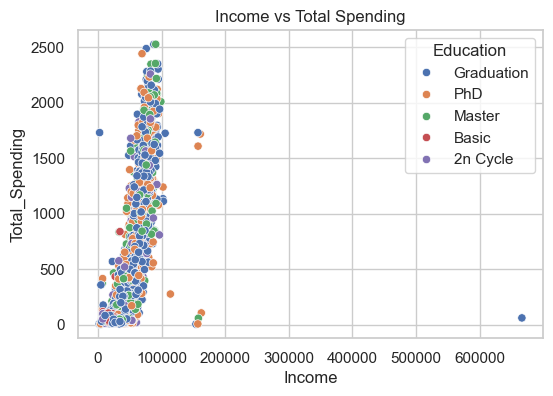

In [8]:
#Bivariate Analysis
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Marital_Status', y='Income')
plt.title('Income by Marital Status')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Income', y='Total_Spending', hue='Education')
plt.title('Income vs Total Spending')
plt.show()


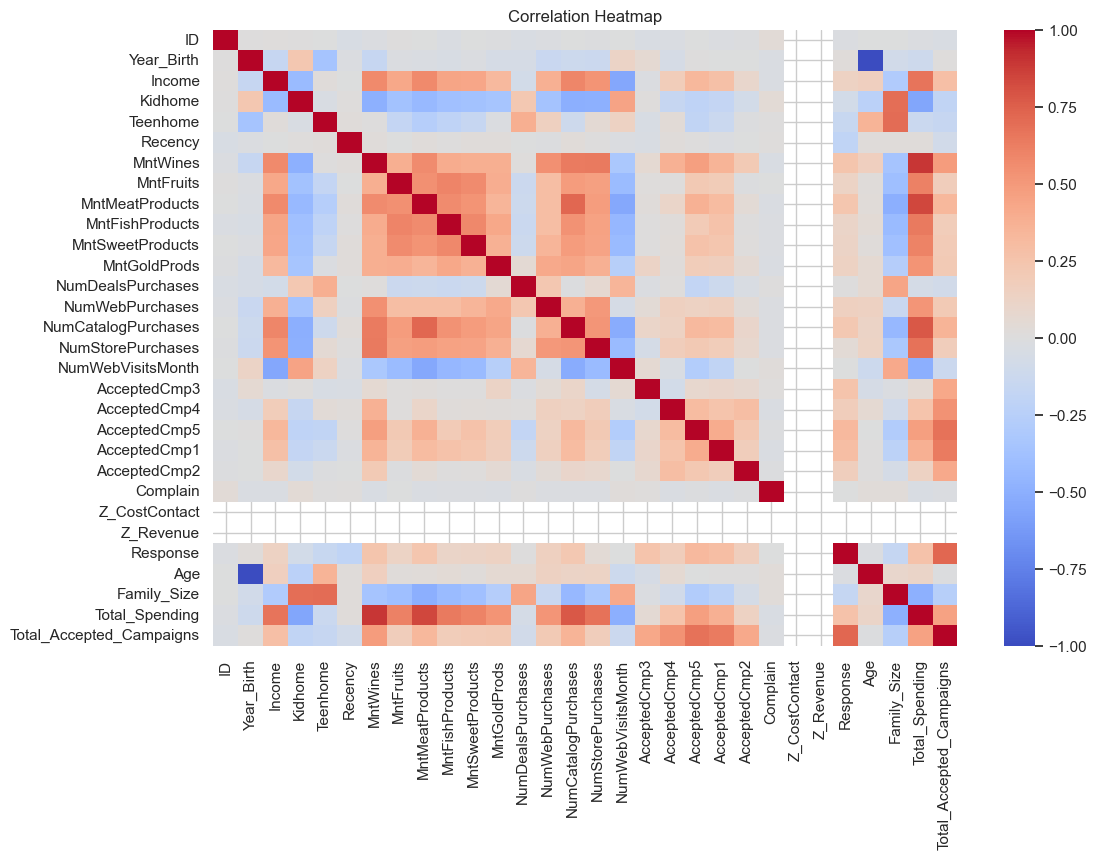

In [12]:
# Correlation Heatmap (Numeric Only)
numeric_df = df.select_dtypes(include=[np.number])  # keep only numeric columns

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


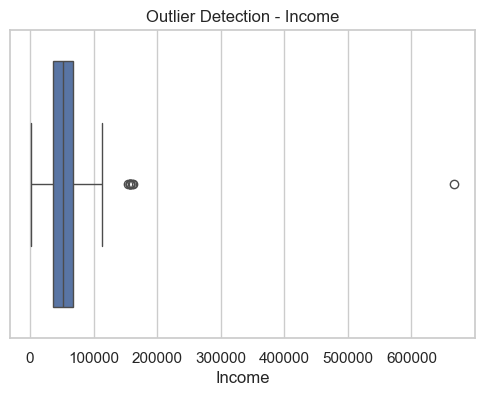

In [13]:
#Outlier Detection Example
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Income'])
plt.title('Outlier Detection - Income')
plt.show()


In [14]:
#Save Cleaned Data
df.to_csv("marketing_campaign_cleaned.csv", index=False)
print("✅ Cleaned data saved to marketing_campaign_cleaned.csv")


✅ Cleaned data saved to marketing_campaign_cleaned.csv
